In [1]:
# import dependencies
import pandas as pd
from config import api_key_av
import requests


### Initalizing Dataset for Pre-run Analysis ###
def ds_init(tickers = ['FB' ,'AMZN', 'AAPL', 'NFLX', 'GOOG'], interval = '1min'):

    init_df = pd.DataFrame()

    # Loop through each ticker
    for ticker in tickers:
        
        # init of parsed data objects
        time_parse = []
        price_parse = []
        volume_parse = []
        parse_df = pd.DataFrame()

        # making API call
        params = {
            'function' : 'TIME_SERIES_INTRADAY',
            'symbol' : ticker,
            'interval': interval,
            'outputsize' : 'full',
            'datatype' : 'json',
            'apikey' : api_key_av
        }
        url = 'https://www.alphavantage.co/query?'
        response = requests.get(url, params).json()
        # parsing data into parsed data objects
        for time in response[f'Time Series ({interval})']:
            time_parse.append(time)
            price_parse.append(float(response[f'Time Series ({interval})'][time]['4. close']))
            volume_parse.append(float(response[f'Time Series ({interval})'][time]['5. volume']))


        # creating dataframe from parsed data objects
        parse_df['time'] = time_parse
        parse_df[f'{ticker}_price'] = price_parse
        parse_df[f'{ticker}_volume'] = volume_parse

        if ticker == tickers[0]:
            init_df = parse_df
        else:
            init_df = init_df.merge(parse_df, on='time', how='inner')
        
        init_df = init_df.set_index('time').sort_index()
        
    return init_df

In [2]:
#import dependencies
import pandas as pd
from config import api_key_av
import requests

### Recalling new data to dataset ###
def ds_recall(tickers = ['FB' ,'AMZN', 'AAPL', 'NFLX', 'GOOG'], interval = '1min'):
    
    # checking for initalized dataframes and recurrent recalls
    try:
        len(master_df)
    except:
        return 'Error with initalized dataset'

    # initalizing 
    cur_ds = []

    # looping through all tickers, making API call, and appending latest data to bottom of master_df
    for ticker in tickers:
        
        try: 
            params = {
                'function' : 'TIME_SERIES_INTRADAY',
                'symbol' : ticker,
                'interval': interval,
                'outputsize' : 'compact',
                'datatype' : 'json',
                'apikey' : api_key_av
            }

            url = 'https://www.alphavantage.co/query?'

            response = requests.get(url, params).json()


            # parsing data into parsed data objects
            for time in response[f'Time Series ({interval})']:
                cur_item = response['Time Series (1min)'][time]
                cur_close = float(response['Time Series (1min)'][next(iter(response['Time Series (1min)']))]['4. close'])
                cur_volume = float(response['Time Series (1min)'][next(iter(response['Time Series (1min)']))]['5. volume'])
        
        except:
            cur_close = ''
            cur_volume = ''
            
        cur_ds.append(cur_close)
        cur_ds.append(cur_volume)
        
    cur_time = [next(iter(response['Time Series (1min)']))][0]
    master_df.loc[cur_time] = cur_ds
    
    # function return
    return master_df

In [3]:
import time

tickers = ['FB' ,'AMZN', 'AAPL', 'NFLX', 'GOOG']
interval= '1min'

# init parameters
script_stop = False
now = int(time.time())

### @TODO delete me for final product
counter = 0

# initializing dataset and defining next call time
master_df = ds_init(tickers=tickers, interval=interval)
wait_time = now + 60

### a bunch of report out and modeling



while script_stop == False:
    
    # waiting for next call time and setting new wait time
    while now < wait_time:
        now = int(time.time())
    wait_time = now + 60
    
    # making API recall
    master_df = ds_recall(tickers=tickers, interval=interval)
    
    
    
    ### more modeling & decision making
    
    
    # check to see if user has changed the stop criteria
    counter += 1
    if counter == 2:
        script_stop = True

init successful
enter wait@ 1582320800
exit wait@ 1582320860
recall successful@ 1582320860
enter wait@ 1582320860
exit wait@ 1582320920
recall successful@ 1582320920


In [4]:
master_df

,FB_price,FB_volume,AMZN_price,AMZN_volume,AAPL_price,AAPL_volume,NFLX_price,NFLX_volume,GOOG_price,GOOG_volume
time,,,,,,,,,,
2020-02-14 09:31:00,213.7499,374352.0,2152.0649,76499.0,325.0500,539699.0,381.4450,72929.0,1518.0500,17411.0
2020-02-14 09:32:00,213.5300,31601.0,2151.8401,11478.0,325.2050,65431.0,382.4227,11282.0,1516.4100,2272.0
2020-02-14 09:33:00,213.9999,39282.0,2151.8726,11067.0,325.6107,100594.0,383.6188,25585.0,1518.6786,4646.0
2020-02-14 09:34:00,214.3500,58063.0,2153.7100,13328.0,325.8400,70769.0,384.2600,27006.0,1519.6086,2378.0
2020-02-14 09:35:00,214.1785,30211.0,2156.9163,7935.0,325.8022,92521.0,384.2500,18345.0,1518.7950,2947.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-21 15:56:00,210.3300,64979.0,2096.8000,31309.0,313.2733,136867.0,379.8100,26526.0,1486.6075,15600.0
2020-02-21 15:57:00,210.1250,53487.0,2094.0601,30185.0,313.3475,135271.0,379.7500,19742.0,1485.2500,11270.0
2020-02-21 15:58:00,210.0550,65074.0,2093.9800,33331.0,313.2400,157220.0,379.4800,31180.0,1484.3850,10897.0


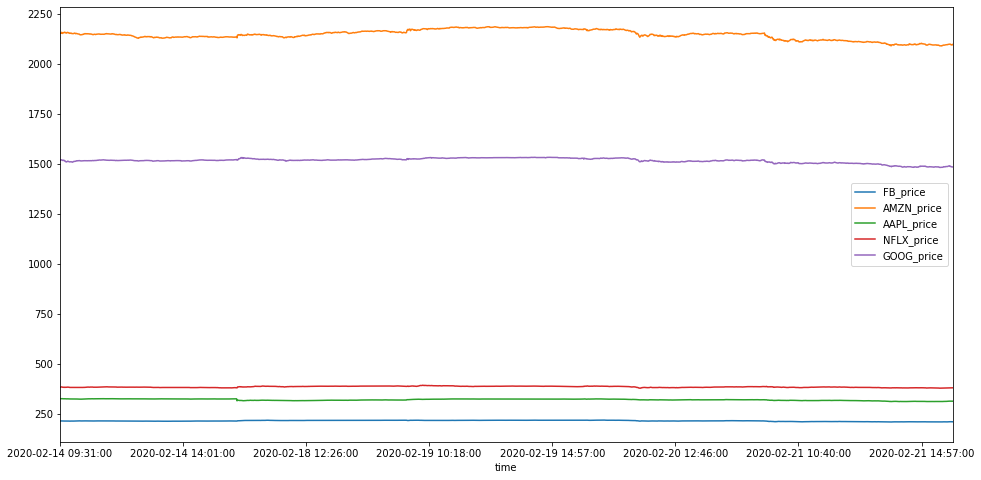

In [12]:
master_df[[item for item in list(master_df.columns) if 'price' in item.split('_')]].plot(kind='line',figsize=(16,8))

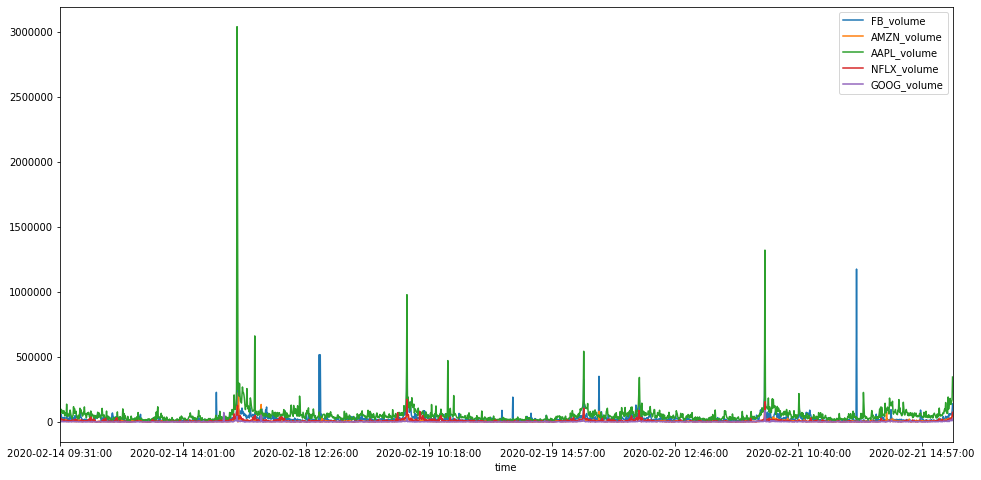

In [17]:
master_df[[item for item in list(master_df.columns) if 'volume' in item.split('_')]].plot(kind='line',figsize=(16,8))

In [89]:
from datetime import datetime
now = int(time.time())

# now_str = datetime.utcfromtimestamp(now).strftime('%Y-%m-%d %H:%M:%S')

datetime.utcfromtimestamp(now)

datetime.datetime(2020, 2, 21, 22, 6, 13)

In [93]:
master_df.describe()


,FB_price,FB_volume,AMZN_price,AMZN_volume,AAPL_price,AAPL_volume,NFLX_price,NFLX_volume,GOOG_price,GOOG_volume
count,1814.000000,1.814000e+03,1814.000000,1814.000000,1814.000000,1.814000e+03,1814.000000,1814.000000,1814.000000,1814.000000
mean,214.842735,2.586091e+04,2145.094255,6673.043550,320.268836,5.526262e+04,384.620469,8828.772326,1515.656801,2329.316979
std,2.696282,4.691023e+04,24.901198,10183.335422,3.983190,9.775683e+04,3.209290,11018.483090,12.142015,3736.098843
min,208.880000,0.000000e+00,2088.530000,0.000000,310.610000,5.534000e+03,377.959500,311.000000,1481.435100,87.000000
25%,213.329600,1.096200e+04,2132.244975,2716.250000,317.136250,2.575600e+04,381.901750,3449.750000,1511.050750,908.250000
50%,214.807300,1.660800e+04,2146.557350,4505.500000,320.327500,4.084900e+04,384.267500,5800.000000,1517.306000,1673.000000
75%,217.339475,2.780650e+04,2164.768675,7686.250000,324.061050,6.361250e+04,387.670000,10226.500000,1525.060100,2778.750000
max,218.727400,1.176907e+06,2184.923600,226461.000000,325.840000,3.041770e+06,392.923400,174022.000000,1532.060100,87365.000000
